In [0]:
from google.colab import files
uploaded = files.upload()

Saving 005930.KS.csv to 005930.KS.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime


Using TensorFlow backend.


In [0]:
data = pd.read_csv('/content/drive/My Drive/inha/new_sam.csv')

In [3]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2015-01-22,27960.0,27980.0,27560.0,27560.0,267.268097,17957700.0
1,1,2015-01-23,28000.0,28000.0,27540.0,27720.0,268.819702,12858750.0
2,2,2015-01-26,27500.0,27900.0,27280.0,27780.0,269.40155,10153500.0
3,3,2015-01-27,27500.0,28000.0,27480.0,28000.0,271.535034,9957200.0
4,4,2015-01-28,27720.0,27800.0,27480.0,27560.0,267.268097,10831500.0


In [4]:
data.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1222,1222,2020-01-16,59100.0,60700.0,59000.0,60700.0,60700.0,14381774.0
1223,1223,2020-01-17,61900.0,62000.0,61000.0,61300.0,61300.0,16025661.0
1224,1224,2020-01-20,62000.0,62800.0,61700.0,62400.0,62400.0,12528855.0
1225,1225,2020-01-21,62000.0,62400.0,61200.0,61400.0,61400.0,11142693.0
1226,1226,2020-01-22,60500.0,62600.0,60400.0,62300.0,62300.0,15027360.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1227 non-null   int64 
 1   Date        1227 non-null   object
 2   Open        1227 non-null   object
 3   High        1227 non-null   object
 4   Low         1227 non-null   object
 5   Close       1227 non-null   object
 6   Adj Close   1227 non-null   object
 7   Volume      1227 non-null   object
dtypes: int64(1), object(7)
memory usage: 76.8+ KB


In [6]:
data.dropna()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2015-01-22,27960.0,27980.0,27560.0,27560.0,267.268097,17957700.0
1,1,2015-01-23,28000.0,28000.0,27540.0,27720.0,268.819702,12858750.0
2,2,2015-01-26,27500.0,27900.0,27280.0,27780.0,269.40155,10153500.0
3,3,2015-01-27,27500.0,28000.0,27480.0,28000.0,271.535034,9957200.0
4,4,2015-01-28,27720.0,27800.0,27480.0,27560.0,267.268097,10831500.0
...,...,...,...,...,...,...,...,...
1222,1222,2020-01-16,59100.0,60700.0,59000.0,60700.0,60700.0,14381774.0
1223,1223,2020-01-17,61900.0,62000.0,61000.0,61300.0,61300.0,16025661.0
1224,1224,2020-01-20,62000.0,62800.0,61700.0,62400.0,62400.0,12528855.0
1225,1225,2020-01-21,62000.0,62400.0,61200.0,61400.0,61400.0,11142693.0


In [12]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

TypeError: ignored

'27980.0'

In [0]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [0]:
from sklearn.preprocessing import scale, minmax_scale

X = np.array(result)
print(np.max(X))
print(np.min(X))
Z = minmax_scale(X)

62250.0
21240.0


In [0]:
Z.shape

(1165, 51)

In [0]:
x_set = Z[:, :-1]
y_set = Z[:, -1]

In [0]:
print(x_set.shape)
print(y_set.shape)

(1165, 50)
(1165,)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size = 0.1)

In [0]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
y_train = np.reshape(y_train,(y_train.shape[0], 1))

In [0]:
y_test = np.reshape(y_test,(y_test.shape[0], 1))

In [0]:
model = Sequential()

model.add(LSTM(60, batch_input_shape=(None, 50, 1)), stateful=True)



model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.summary()

TypeError: ignored

In [0]:
model.fit(x_train, y_train,
    batch_size=32,
    epochs=50)

Epoch 1/50
1048/1048 [==============================] - 3s 3ms/step - loss: 0.0374 - acc: 0.0019
Epoch 2/50
1048/1048 [==============================] - 3s 2ms/step - loss: 0.0024 - acc: 0.0019
Epoch 3/50
1048/1048 [==============================] - 3s 2ms/step - loss: 0.0011 - acc: 0.0019
Epoch 4/50
1048/1048 [==============================] - 3s 2ms/step - loss: 9.2363e-04 - acc: 0.0019
Epoch 5/50
1048/1048 [==============================] - 3s 2ms/step - loss: 9.4316e-04 - acc: 0.0019
Epoch 6/50
1048/1048 [==============================] - 3s 2ms/step - loss: 9.4307e-04 - acc: 0.0019
Epoch 7/50
1048/1048 [==============================] - 3s 2ms/step - loss: 8.8779e-04 - acc: 0.0019
Epoch 8/50
1048/1048 [==============================] - 3s 2ms/step - loss: 9.3218e-04 - acc: 0.0019
Epoch 9/50
1048/1048 [==============================] - 3s 2ms/step - loss: 8.3265e-04 - acc: 0.0019
Epoch 10/50
1048/1048 [==============================] - 3s 2ms/step - loss: 8.1249e-04 - acc: 0.0019
E

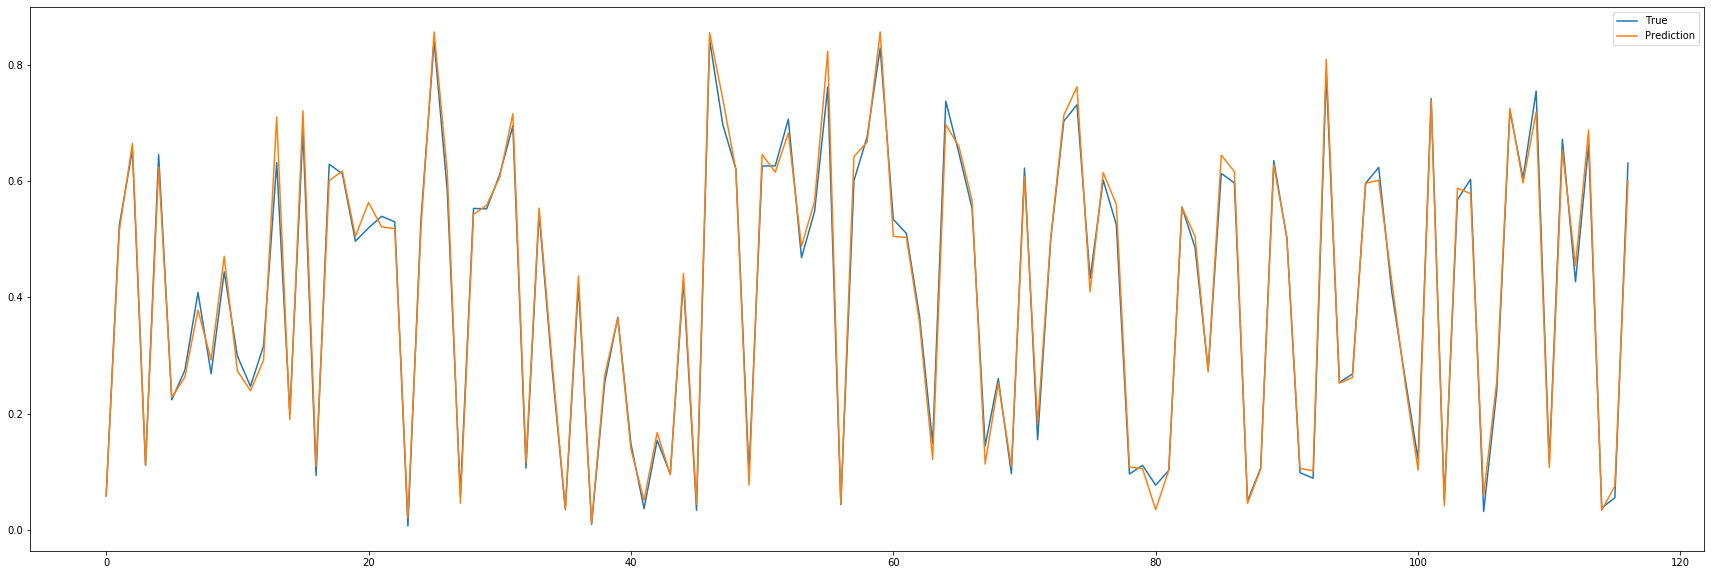

In [0]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(30, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

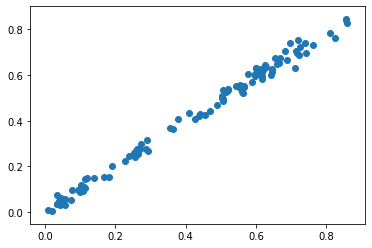

In [0]:
plt.scatter(pred, y_test)

In [0]:
model.evaluate(x_test, y_test)

117/117 [==============================] - 0s 3ms/step


[0.0004383585138174777, 0.0]

In [0]:
a = np.max(X)
b = np.min(X)

In [0]:
def reverse_minmax(max, min, array):
  return (array * (max - min)) + min

In [0]:
reverse_minmax(a, b, pred)


array([[42519.703],
       [44600.97 ],
       [46605.07 ],
       [55231.79 ],
       [42358.227],
       [33009.434],
       [48319.78 ],
       [44353.594],
       [47026.004],
       [46995.188],
       [50631.62 ],
       [25177.998],
       [51974.31 ],
       [48372.25 ],
       [44981.594],
       [25969.176],
       [23209.305],
       [26060.32 ],
       [28082.627],
       [46925.97 ],
       [43163.367],
       [44356.195],
       [32568.137],
       [54496.934],
       [27069.654],
       [51700.016],
       [45732.516],
       [49040.336],
       [45066.04 ],
       [44476.184],
       [24470.668],
       [50252.836],
       [26178.322],
       [25874.58 ],
       [23566.672],
       [30994.508],
       [51475.96 ],
       [47350.47 ],
       [23278.898],
       [47233.42 ],
       [44335.5  ],
       [42261.492],
       [30613.   ],
       [47052.914],
       [26995.412],
       [45995.297],
       [47530.156],
       [42883.867],
       [25860.305],
       [47721.66 ],


In [0]:
pred.squeeze(axis=1)

array([0.51889056, 0.5696408 , 0.6185094 , 0.8288659 , 0.5149531 ,
       0.2869894 , 0.6603214 , 0.56360877, 0.62877357, 0.62802213,
       0.716694  , 0.0960253 , 0.7494345 , 0.6616008 , 0.57892203,
       0.1153176 , 0.04802013, 0.11754014, 0.16685265, 0.6263343 ,
       0.53458595, 0.5636722 , 0.27622867, 0.81094694, 0.14215203,
       0.7427461 , 0.5972328 , 0.6778916 , 0.58098125, 0.566598  ,
       0.07877757, 0.70745766, 0.1204175 , 0.11301097, 0.05673426,
       0.23785678, 0.7372826 , 0.63668543, 0.04971709, 0.63383126,
       0.5631675 , 0.51259434, 0.22855398, 0.6294297 , 0.14034167,
       0.60364056, 0.641067  , 0.5277705 , 0.1126629 , 0.64573663,
       0.37928122, 0.10919184, 0.04773736, 0.55186665, 0.71187997,
       0.5739606 , 0.26146647, 0.07407288, 0.6984986 , 0.10959324,
       0.11787001, 0.8347818 , 0.6076213 , 0.70174414, 0.69570917,
       0.72288597, 0.7265097 , 0.06351889, 0.37418133, 0.11640884,
       0.25126508, 0.7561974 , 0.10510477, 0.5937992 , 0.63219

In [0]:
pred.shape

(233, 1)

In [0]:
pred.shape

(233, 1)